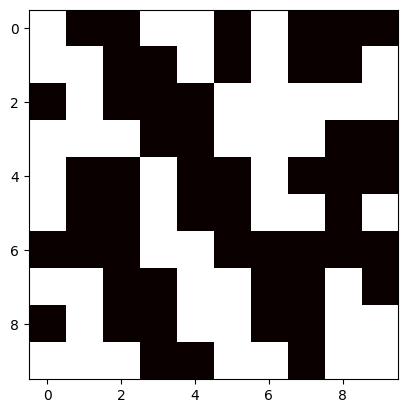

In [1]:
#we start with a 10 by 10 grid of spins

import numpy as np
import matplotlib.pyplot as plt
import random

#initialize the grid with random spins given a grid size n
def initialize_grid(n):
    rng = np.random.default_rng()
    grid = rng.choice([-1,1], size=(n,n))
    return grid

#test that the grid is initialized correctly

#we're going to start with a 10 by 10 grid
grid = initialize_grid(10)

#\visualize the grid as a heatmap
plt.imshow(grid, cmap='hot', interpolation='nearest')
plt.show()

In [2]:
def compute_energy(grid):
    energy = 0
    n = len(grid)
    for i in range(n):
        for j in range(n):
            #check the energy at each point by selecting the nearest neighbors and checking whether they are the same spin
            #each neighbor contributes -1 to the energy if they are the same spin
            #each neighbor contributes +1 to the energy if they are the opposite spin
            energy += -grid[i,j]*(grid[(i+1)%n,j] + grid[i,(j+1)%n] + grid[(i-1)%n,j] + grid[i,(j-1)%n])

    #our energy is double counted, so we divide by 4 to get the correct energy
    return int(energy/4)

#test that the energy is computed correctly
print(compute_energy(grid))

-8


In [3]:
def generate_energy_map(grid):
    n = len(grid)
    energy_map = np.zeros((n,n), dtype=int)
    for i in range(n):
        for j in range(n):
            energy_map[i,j] = -grid[i,j]*(grid[(i+1)%n,j] + grid[i,(j+1)%n] + grid[(i-1)%n,j] + grid[i,(j-1)%n])
    return energy_map

#test that the energy map is computed correctly
energy_map = generate_energy_map(grid) 
print(energy_map)

[[ 0  2  0  2  0  2  0 -2 -2  2]
 [-2  0 -2  0  2  2  0  0  0  0]
 [ 4  0  0 -4  0  0 -4 -2  0  0]
 [ 0 -2  2  0 -2  0 -4  0  0  0]
 [ 0  0  0  2 -2  0  0  2 -4  0]
 [ 0 -2 -2  0  0 -2  0  2  0  2]
 [ 0 -2 -2  0  0  0 -2 -2 -2 -2]
 [ 2  0 -2  0 -2  0 -2 -2  2  2]
 [ 4  0  0 -2  0 -2  0 -2 -2  0]
 [-2 -2  2  0  2  0  0  0  0 -2]]


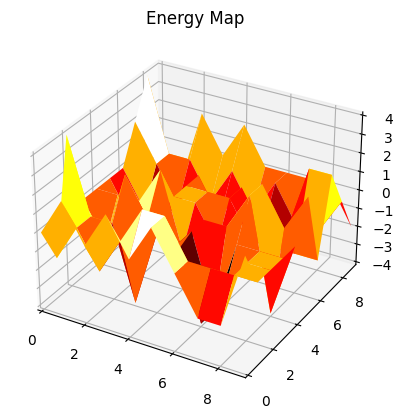

In [4]:
#prints the energy map as a 3d plot
from mpl_toolkits.mplot3d import Axes3D

def plot_energy_map(energy_map):
    n = len(energy_map)
    x = np.arange(n)
    y = np.arange(n)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #set the limits of the plot
    ax.set_xlim(0, n-1)
    ax.set_ylim(0, n-1)
    ax.set_zlim(-4, 4)
    ax.plot_surface(X, Y, energy_map, cmap='hot')
    ax.title.set_text('Energy Map')
    plt.show()

plot_energy_map(energy_map)

spin at (6,3) is flipped
[[ 1 -1 -1  1  1 -1  1 -1 -1 -1]
 [ 1  1 -1 -1  1 -1  1 -1 -1  1]
 [-1  1 -1 -1 -1  1  1  1  1  1]
 [ 1  1  1 -1 -1  1  1  1 -1 -1]
 [ 1 -1 -1  1 -1 -1  1 -1 -1 -1]
 [ 1 -1 -1  1 -1 -1  1  1 -1  1]
 [-1 -1 -1 -1  1 -1 -1 -1 -1 -1]
 [ 1  1 -1 -1  1  1 -1 -1  1 -1]
 [-1  1 -1 -1  1  1 -1 -1  1  1]
 [ 1  1  1 -1 -1  1  1 -1  1  1]]
-8


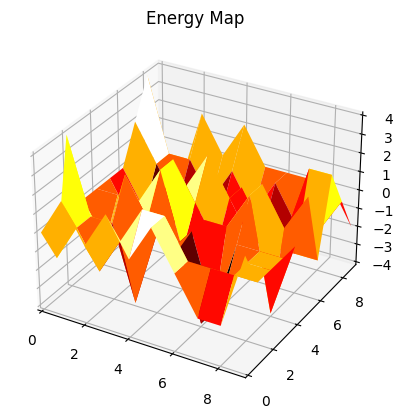

In [5]:
#flip a random spin in the grid
def flip_spin(grid):
    n = len(grid)
    i = random.randint(0,n-1)
    j = random.randint(0,n-1)
    grid[i,j] = -grid[i,j]
    print("spin at (" + str(i) + "," + str(j) + ") is flipped")
    return grid

#test that the spin is flipped correctly
changed_grid = flip_spin(grid)
print(changed_grid)
print(compute_energy(changed_grid))
plot_energy_map(generate_energy_map(changed_grid))

In [6]:
def metropolis(grid, kT):
    n = len(grid)
    i = random.randint(0,n-1)
    j = random.randint(0,n-1)
    delta_E = 2*grid[i,j]*(grid[(i+1)%n,j] + grid[i,(j+1)%n] + grid[(i-1)%n,j] + grid[i,(j-1)%n])
    if delta_E < 0:
        grid[i,j] = -grid[i,j]
    elif random.random() < np.exp(-delta_E/kT):
        grid[i,j] = -grid[i,j]
    return grid

In [7]:
def ising(n,kT,nsteps):
    grid = initialize_grid(n)
    

    #plot the initial grid
    plt.imshow(grid, cmap='hot', interpolation='nearest')
    plt.title('Initial Grid')
    plt.show()
    #we initialize the energy array so that we can save time by not having to reallocate memory every step
    energy = np.zeros(nsteps)
    energy[0] = compute_energy(grid)
    print("Initial grid energy", energy[0])
    #plot the energy map of the initial grid
    plot_energy_map(generate_energy_map(grid))
    for steps in range(nsteps):
        grid = metropolis(grid, kT)
        energy[steps] = compute_energy(grid)
    
    
    #plot the final grid
    plt.imshow(grid, cmap='hot', interpolation='nearest')
    plt.title('Final Grid')
    plt.show()
    
    print("Final grid energy:", energy[nsteps-1])

    #plot the energy map of the final grid
    plot_energy_map(generate_energy_map(grid))

    #plot the energy as a function of time
    plt.axes(xlabel='Time', ylabel='Energy')
    #limit the y axis to the range of energies from the initial grid to the final grid
    plt.ylim(min(energy), max(energy))
    #limit the x axis to the number of steps
    plt.xlim(0,nsteps)
    plt.title('Energy as a function of time')
    plt.plot(energy)
    plt.show()

Now that our functions are set up and working correctly, we can start to look at the results of our simulations. We will start by looking at the results of our 2D Ising model with periodic boundary conditions at kT = 5

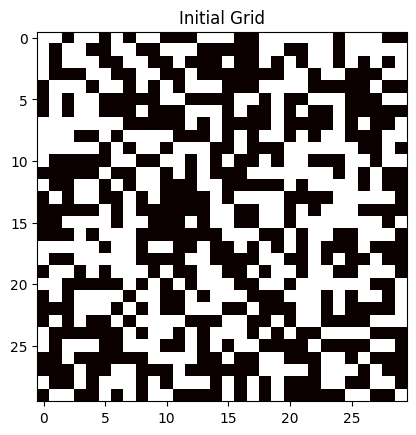

Initial grid energy 0.0


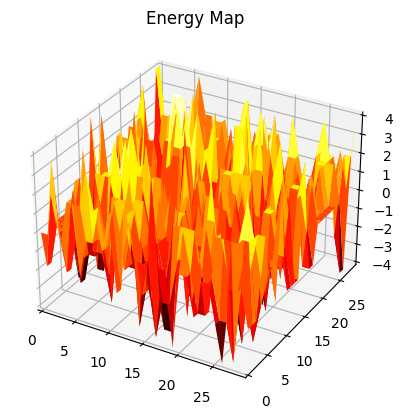

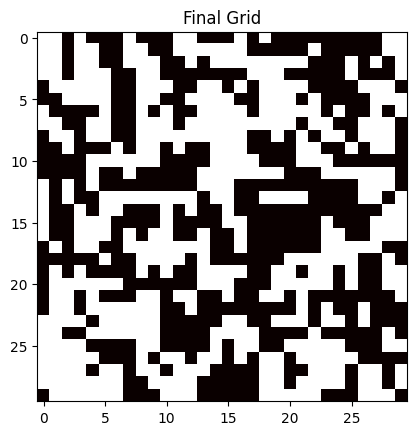

Final grid energy: -222.0


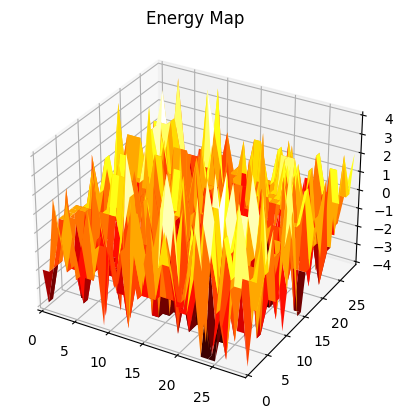

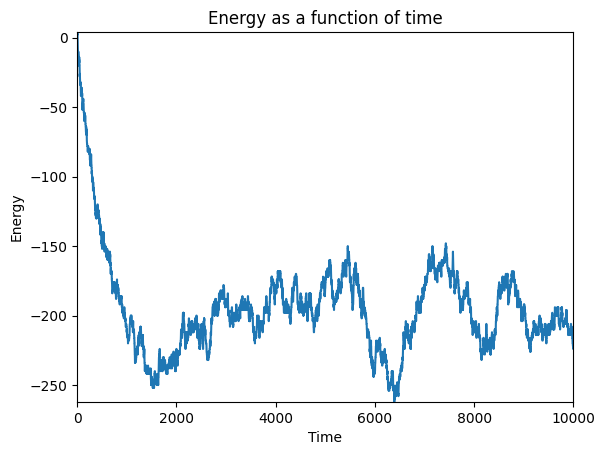

In [8]:
n = 30
kT = 5
nsteps = 10000
ising(n,kT,nsteps)

at kT = 5, we have some decently large chunks of our ferromagnet being aligned. This is our 'medium' temperature simulation, so there are no crazy blobs or TV static.

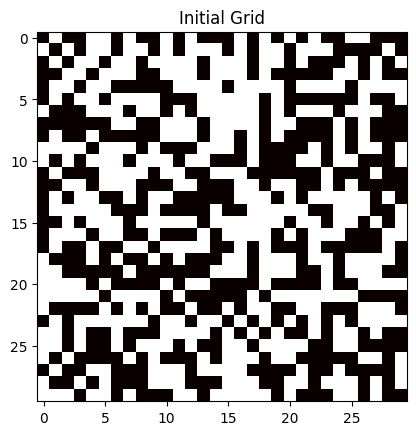

Initial grid energy 4.0


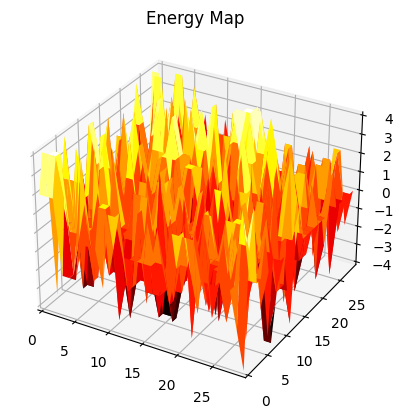

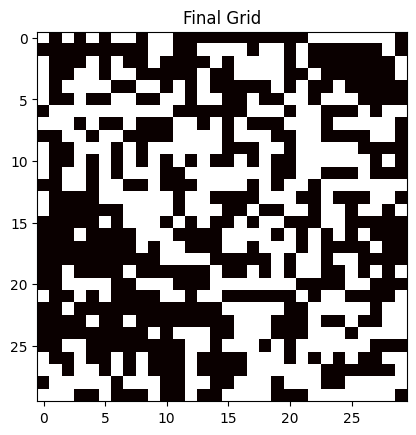

Final grid energy: -124.0


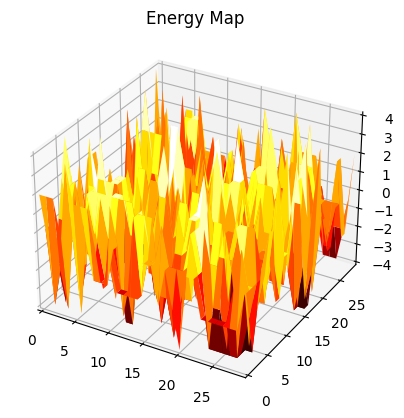

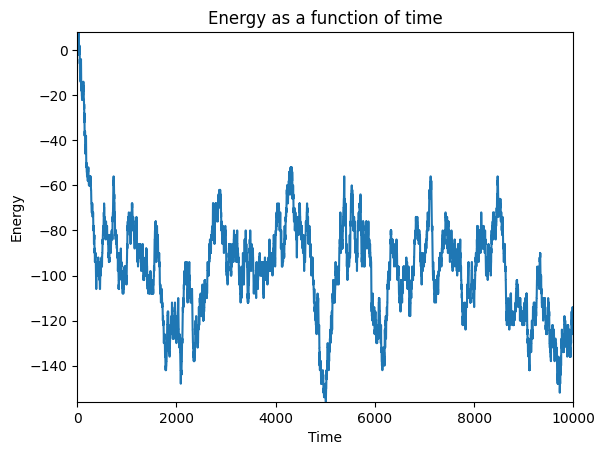

In [9]:
n = 30
kT = 10
nsteps = 10000
ising(n,kT,nsteps)

at kT = 10, we have a lot of TV static. This is our 'high' temperature simulation, so we expect to see a lot of TV static. There is some alignment that is happening, but it is not as strong as the 'medium' temperature simulation.

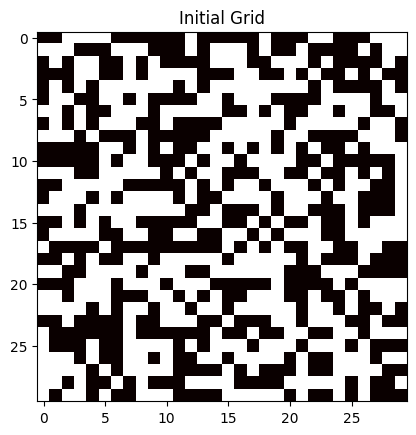

Initial grid energy 8.0


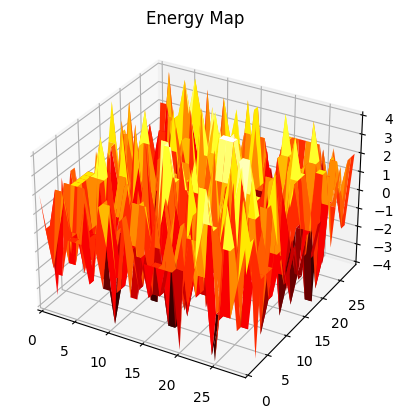

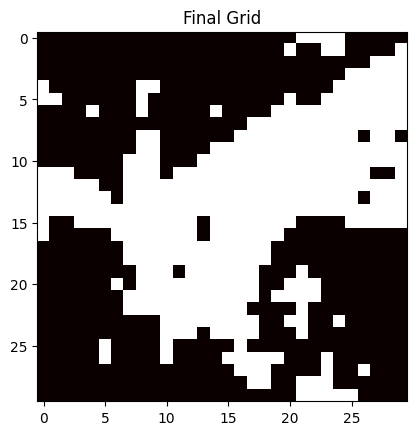

Final grid energy: -640.0


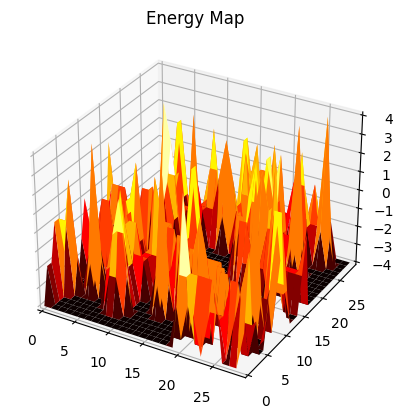

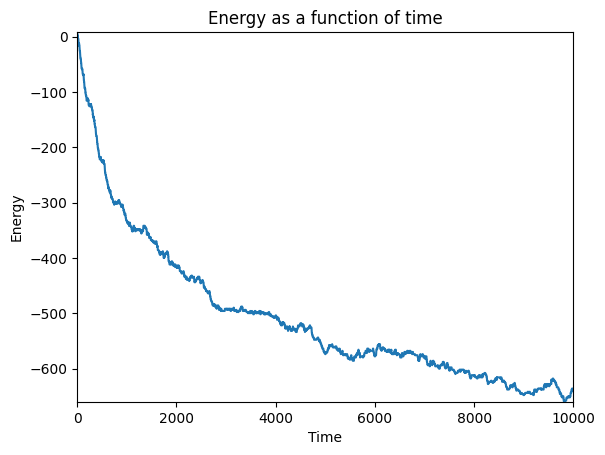

In [143]:
#let's make a simulation with a low temperature but a large number of steps
n = 30
kT = 2
nsteps = 10000
ising(n,kT,nsteps)

at kT = 2, we see a drastic change in the results. We see a lot of alignment in the ferromagnet. The energy map also displays that the energy is very low at many points in the system, which we expect to see in a 'low' temperature simulation.

Changing n to a lower number helps to improve the simulation speed. changing our n values around from 50 to 30 helped performance significantly, as we are not only simulating a smaller lattice but we also dont have to have n^2 more chances for bit flips. With the same number of steps, we should get more chances for each spin to flip. The simulation time is also reduced.

Additionally, we can observe the 'phase change' behavior that we are looking for, as we get large spin groupings at the low temperature.

# Report Write-up Questions:

## 1. Why do we need periodicity?

Periodicity is needed to ensure that the spins on the edges of the lattice are also connected to 4 spins for the purposes of computing energy. If we did not have periodicity, then the spins on the edges of the lattice would only be connected to 2 or 3 spins, for which we would need to program special cases.

## 2. What is the physics that the Ising model is trying to simulate?

The Ising model is trying to simulate the behavior of a ferromagnet. A ferromagnet is a material that has a magnetic field that is aligned in the same direction. The Ising model is trying to simulate the behavior of a ferromagnet by using spins on a lattice. The spins are either up or down, and the spins interact with each other. The spins will align in the same direction if they are interacting with each other.

## 3. Why do we use only the nearest neighbors to calculate the energy?

We use only the nearest neighbors to calculate the energy because using more makes the calculation much more complex and computationally expensive. Luckily, the nearest neighbors are enough to determine the behavior of the system due to the inverse square law.

## 4. What is the meaning of temperature?

Temperature is the measure of the amount of ways a system can store available energy. The higher the temperature, the more ways the system can store energy. The lower the temperature, the less ways the system can store energy. In a ferromagnet, the spins will align in the same direction if the system has a low amount of ways to store energy. The spins will not align in the same direction if the system has a high amount of ways to store energy.

## 5. Why are we not worried about units or the actual value of the Boltzmann constant k?

We are not worried about units or the actual value of the Boltzmann constant k because we are only interested in the ratio of the energy of the system to the temperature of the system. The ratio of the energy of the system to the temperature of the system is the same regardless of the units or the actual value of the Boltzmann constant k.

## 6. What does our simulation represent in terms of physics?

Our simulation represents the behavior of a ferromagnet. The spins on the lattice are either up or down, and the spins interact with each other. The spins will align in the same direction if they are interacting with each other. The idea behind the simulation is to display a phase transition between the behavior of the system at a low temperature and the behavior of the system at a high temperature.

## 7. How does the average energy change with respect to changes in N? Is it what you expected? Why or why not?

The average energy decreases with respect to changes in N. This is what I expected because the average energy is the sum of the energy of each spin. The energy of each spin is the sum of the energy of the spin and the energy of the spin's nearest neighbors. The energy of the spin is the same regardless of the number of spins on the lattice. The energy of the spin's nearest neighbors decreases with respect to changes in N because there are fewer spins on the lattice. Therefore, the average energy decreases with respect to changes in N.

## 8. What do low and high temperature imply?

Low temperature implies that the system has a low amount of ways to store energy. High temperature implies that the system has a high amount of ways to store energy. In a ferromagnet, the spins will align in the same direction if the system has a low amount of ways to store energy. The spins will not align in the same direction if the system has a high amount of ways to store energy.

## How does the current application relate to  our  first  experience  with  the  Metropolis  Algorithm? How  is  it  similar  or  different?

The current application relates to ur Markov-Chain lab insofar as we are using the Metropolis algorithm to determine the behavior of the system. Although this involves a different physics application as well as a decent amount of pseudo-random number generation, we can still observe that our systems trend toward the same behavior, where the behavior of the system is determined by the ratio of the energy of the system to the temperature of the system.

## How  does  the Metropolis approach achieve our current goals for understanding the physics?

The Metropolis approach allows us to run simulations with random inputs that trend towards expected outputs. In this lab for example, although we start with a matrix with random spins, for which we randomly select a location for which to flip the spin, we can still observe that the system trends towards the same behavior, depending on the temperature.

## 9. Why were we just interested in the final state of the system in this case?

We were just interested in the final state of the system in this case because we are only interested in the changes in the behavior of the system at a certain temperatures.

## 10. Why did we not need to know the partition function?

We did not need to know the partition function because we are only interested in the ratio of the energy of the system to the temperature of the system. The ratio of the energy of the system to the temperature of the system is the same regardless of the partition function.

## 11. Did you see a phase change? i.e different types of outcomes for the low and high temperature limits?

Yes, the phase change occurs when we run the simulation under low and high temperature conditions. Under low temperature conditions, there are not as many ways to store energy. Therefore, the spins will align in the same direction. Under high temperature conditions, there are more ways to store energy. Therefore, the spins will not align in the same direction, and the heatmap will appear more sporadic.

## 12. Do you get similar or different results with each repeated simulation? What changes, if anything?

I get similar results with each repeated simulation. The results are similar because although we are using pseudo-random number generation in many of our functions, the simulation tends towards the same behavior. The behavior of the system is determined by the ratio of the energy of the system to the temperature of the system. The ratio of the energy of the system to the temperature of the system is the same regardless of the pseudo-random number generation.

## 13. What is the importance of the value of N and the number of trial cycles? How does changing them affect things?

The importance of the value of N is that it is the number of spins on the lattice. The importance of the number of trial cycles is that it is the number of times the spins will flip. The more spins on the lattice, the more spins have a chance to flip. The more spins that flip, the more chances the spins will align in the same direction, especially at low temperature.